In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Load data from csv file

In [2]:
phones_data = pd.read_csv('./train.csv')
phones_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


## Attributes explanation 

battery_power - Total energy a battery can store in one time measured in mAh  
blue - Has bluetooth or not  
clock_speed - Speed at which microprocessor executes instructions  
dual_sim - Has dual sim support or not  
fc - Front Camera mega pixels  
four_g - Has 4G or not  
int_memory - Internal Memory in Gigabytes  
m_dep - Mobile Depth in cm  
mobile_wt - Weight of mobile phone  
n_cores - Number of cores of processor  
pc - Primary Camera mega pixels  
px_height - Pixel Resolution Height  
px_width - Pixel Resolution Width  
ram - Random Access Memory in Megabytes  
sc_h - Screen Height of mobile in cm  
sc_w - Screen Width of mobile in cm  
talk_time - Longest time that a single battery charge will last when you are talking 
three_g - Has 3G or not  
touch_screen - Has touch screen or not  
wifi - Has wifi or not  

## Printing first and last five records in dataset

In [3]:
phones_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
phones_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## Statistics

In [5]:
pd.options.display.max_columns = phones_data.shape[1]
phones_data.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Checking how many missing values are present in each column

In [6]:
phones_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Histograms of all columns

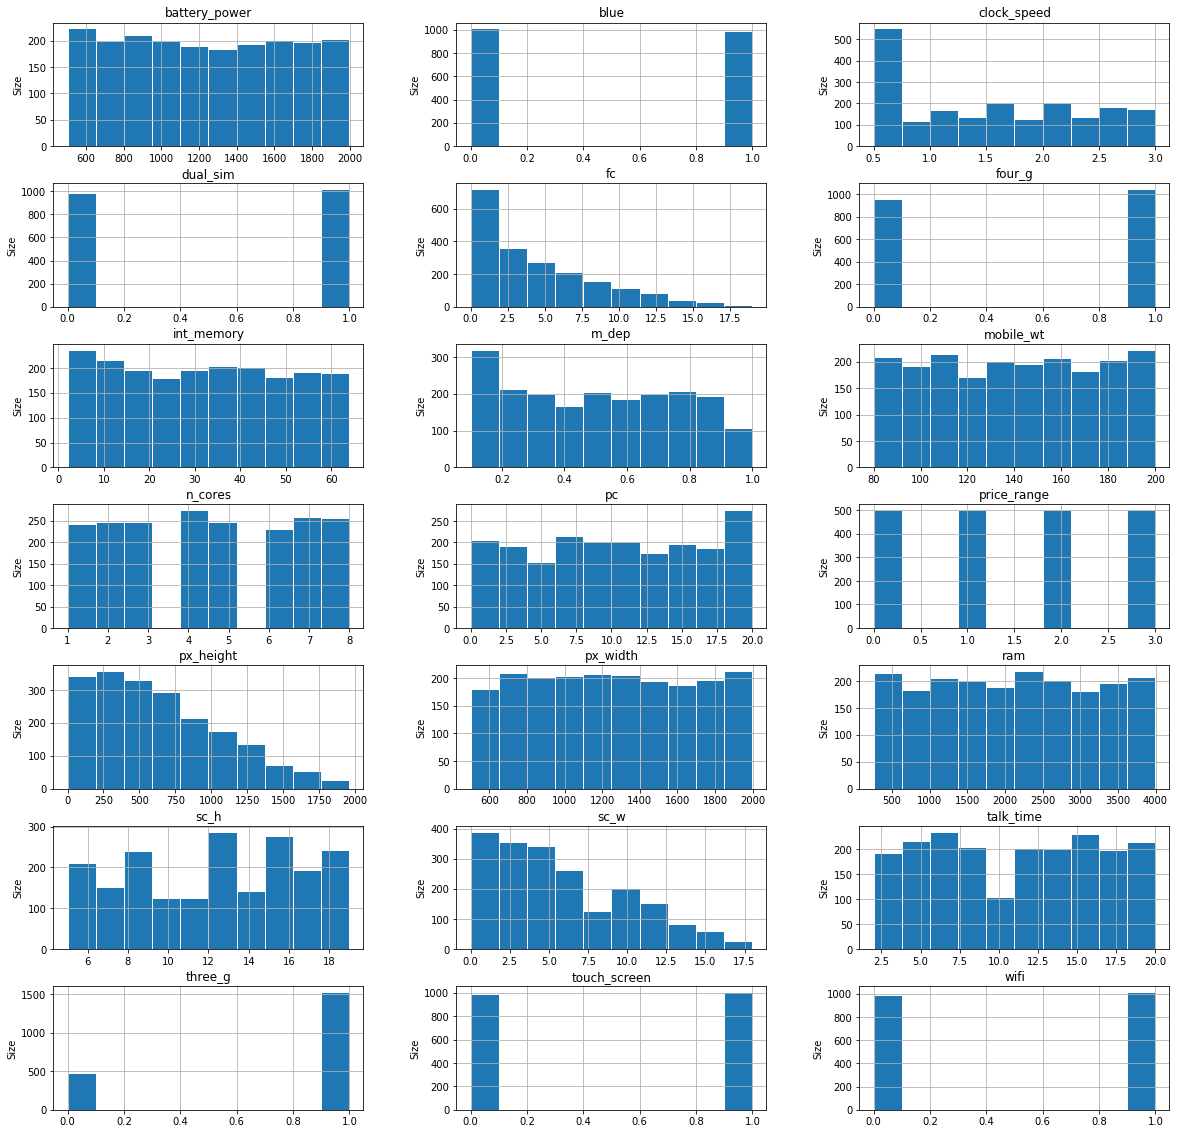

In [7]:
axarr = phones_data.hist(figsize=(20, 20), layout=(7, 3), edgecolor='white')

for ax in axarr.flatten():
    ax.set_ylabel("Size")

## Distribution of explanatory variable - price_range

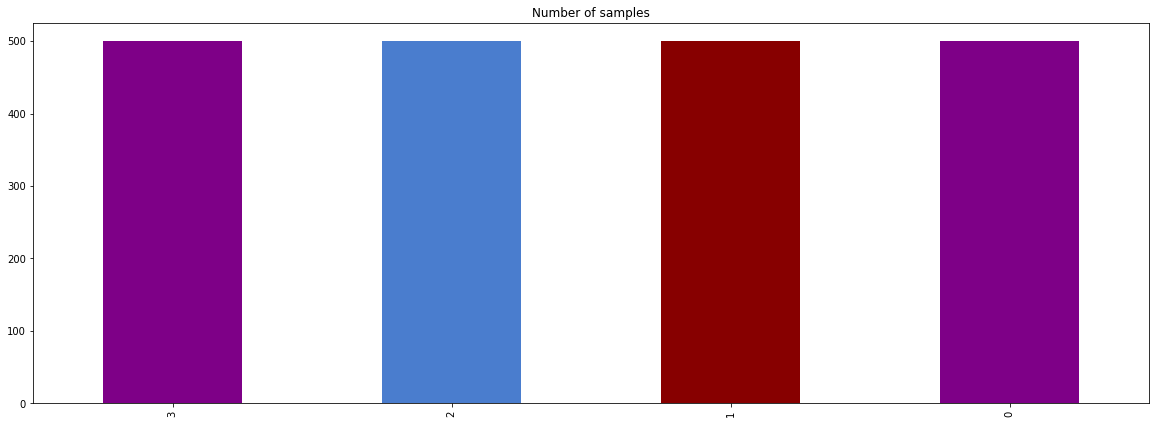

In [8]:
phones_data['price_range'].value_counts().plot(kind='bar',title='Number of samples', color=['#7e0087','#4a7dce','#870000'], figsize=(20, 7));

## Boxplots of all features that are not binary with the class of an explanatory variable

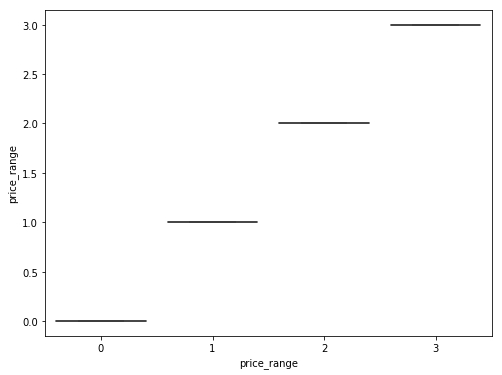

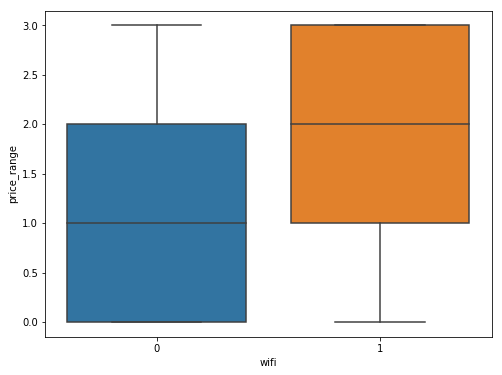

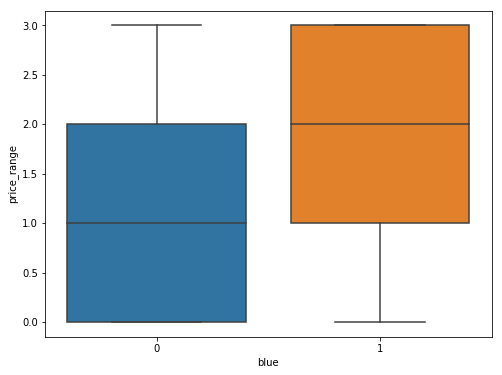

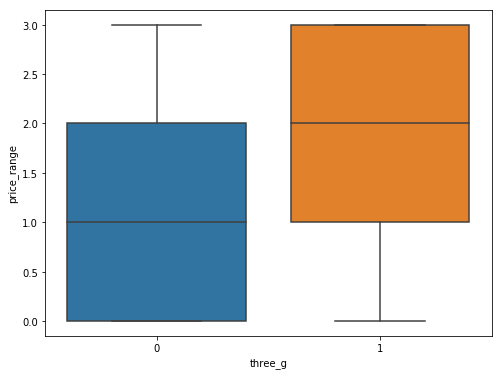

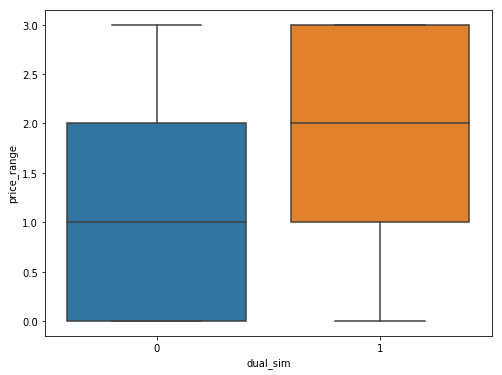

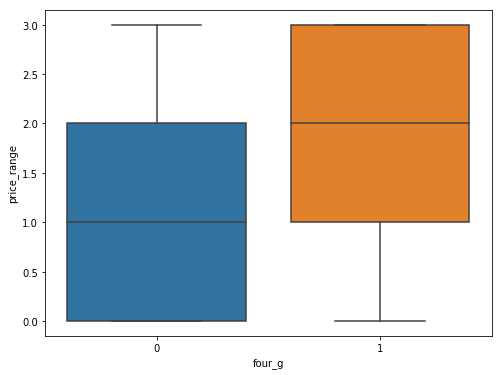

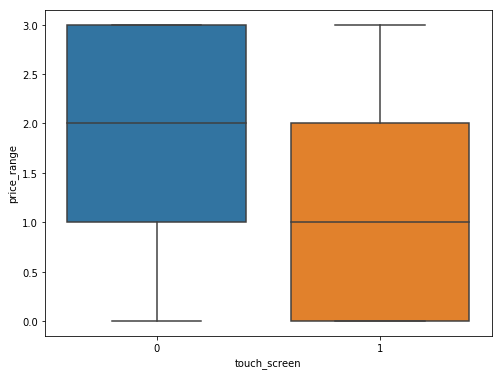

In [9]:
non_binary_cols = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# for feature in non_binary_cols:
for feature in set(phones_data.columns)-set(non_binary_cols):
    plt.figure(figsize=(8,6))
#     ax = sns.boxplot(x="price_range", y=feature, data=phones_data)
#     ax = sns.stripplot(x="price_range", y=feature, data=phones_data, jitter=True, edgecolor="gray")
    ax = sns.boxplot(x=feature, y="price_range", data=phones_data)
#     ax = sns.stripplot(x=feature, y="price_range", data=phones_data, jitter=True, edgecolor="gray")
    plt.show()

## Correlation matrix

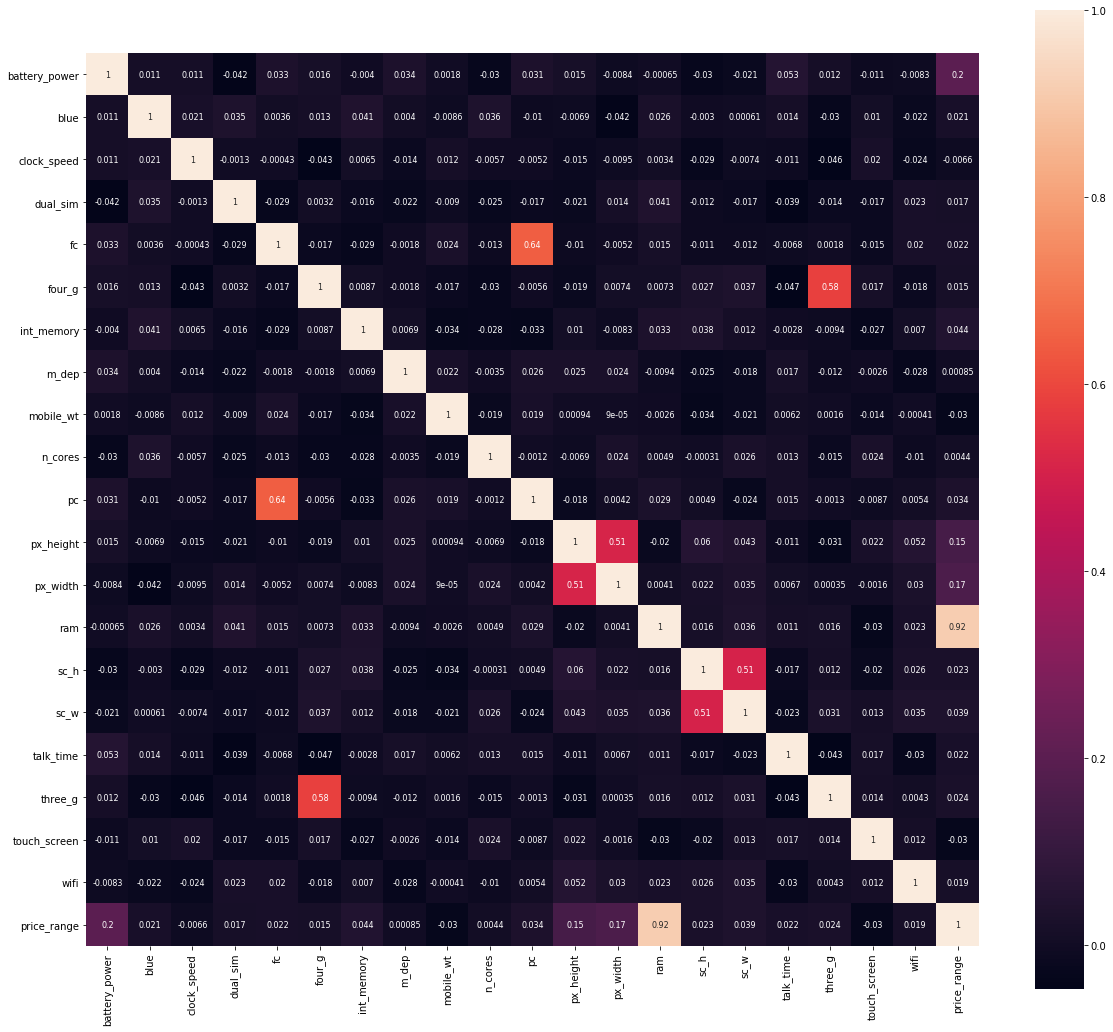

In [10]:
corr = phones_data.corr()
plt.subplots(figsize=(20,18))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,square=True,annot=True,annot_kws={'size':8})


## Checking features importance using random forrest algorithm

 1) ram                            0.467751
 2) battery_power                  0.075149
 3) px_width                       0.058294
 4) px_height                      0.056782
 5) mobile_wt                      0.041670
 6) int_memory                     0.037492
 7) talk_time                      0.032093
 8) sc_w                           0.029357
 9) pc                             0.029237
10) clock_speed                    0.028756
11) sc_h                           0.027809
12) m_dep                          0.026115
13) fc                             0.025892
14) n_cores                        0.023221
15) dual_sim                       0.007341
16) touch_screen                   0.007022
17) blue                           0.006865
18) wifi                           0.006740
19) four_g                         0.006694
20) three_g                        0.005722


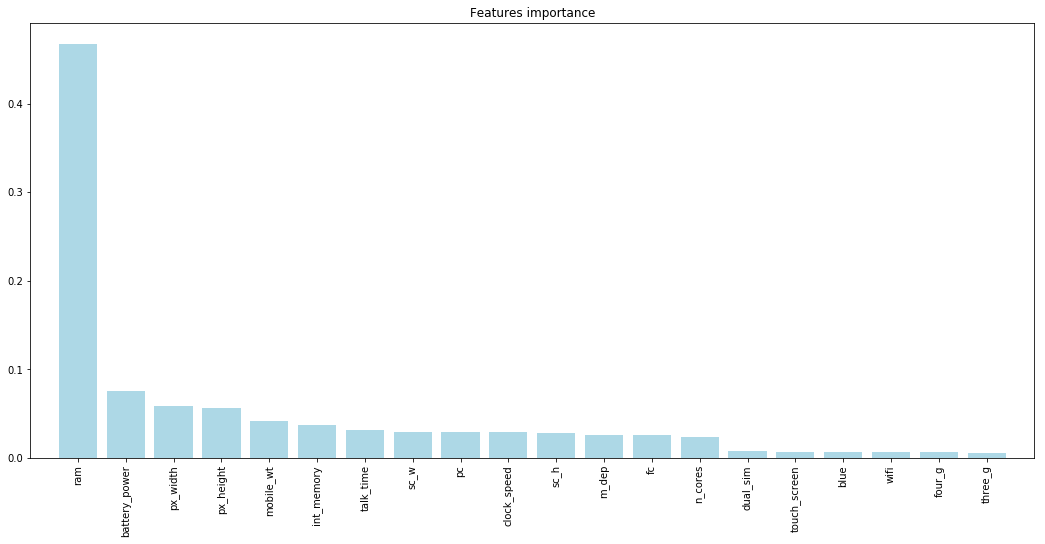

In [11]:
y = np.array(phones_data['price_range'])
X = np.array(phones_data.drop(['price_range'], axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
feat_labels = phones_data.columns[:]
forest = RandomForestClassifier(n_estimators= 10000, criterion='gini', random_state=5, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
    
plt.figure(figsize=(18,8))
plt.title('Features importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')

plt.xticks(range(X_train.shape[1]),
         feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout
plt.show()